In [1]:
from datascience import *
from prob140 import *
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

### Data 188 Spring 2024
### A. Adhikari

# Worksheet Week 12

## 1. One-way ANOVA
The data consist of a random sample of 400 home sales in a part of Ohio over the period 2006 to 2010. For your convenience, we have placed the data in a `Table` called `sales` as well as in a `pandas` dataframe called `df_sales`.

In [3]:
sales = Table.read_table('sales.csv')
df_sales = sales.to_df()

In [4]:
df_sales.shape

(400, 5)

In [5]:
df_sales.head(3)

,Build Period,Lot Area,House Area,Year Sold,Sale Price
0,1960-1979,12493,2867.0,2008,141000
1,Pre 1940,13728,3775.0,2008,235000
2,1960-1979,10710,2802.0,2009,148800


Each row represents a sale. The columns:

- `Build Period`: The period in which the house was built. `'2000+'` means "Year 2000 or later".
- `Lot Area`: Area of the lot in square feet
- `House Area`: Total area of the house in square feet, including garages, decks, etc.
- `Year Sold`: Self-explanatory
- `Sale Price`: In dollars as at the time of sale; not adjusted

### 1a) Comparing Lot Area Distributions

We will compare the distributions of lot areas for the different build periods.

**(i)** Draw a [boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of the all distributions. Since the build periods have a chronological order, we recommend using the option `order=chron_order` with `sns.boxplot`, for the list `chron_order` created in the cell below.

In [6]:
chron_order = ['Pre 1940', '1940-1959', '1960-1979', '1980-1999', '2000+']

In [ ]:
#student
sns.boxplot(...)

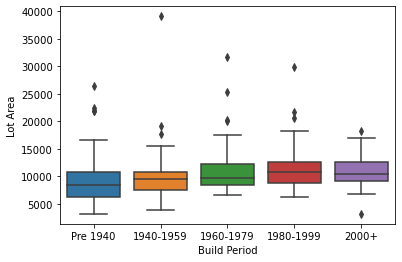

In [7]:
#solution
sns.boxplot(data=df_sales, x='Build Period', y='Lot Area', order=chron_order);

Find the observed group means. The `group` method with the table `sales` will be useful, or you can use `groupby` on `df_sales` if you prefer `pandas`. You are welcome to display the group means in any format.

In [ ]:
...

With the groups as the build periods, state the one-way ANOVA model for lot areas. In what ways is the boxplot consistent or inconsistent with the model? Discuss.

#student

**Your answer here:**

### 1b) One-way ANOVA in `SciPy`

No model is perfect. We are going to start by using the one-way ANOVA model above, in spite of its imperfections. 

State the null hypothesis that all the group means are equal, in terms of the one-way ANOVA model you stated above.

#student

**Your answer here:**

To test this null hypothesis, start by creating the samples of lot sizes in each group. You are welcome to store the group samples in any form as long as you can access each sample easily. Use as many lines and cells as you need.

In [9]:
lots = sales.select('Build Period', 'Lot Area')

In [ ]:
#student


In [10]:
#solution
lots.group(0, list)

Build Period,Lot Area list
1940-1959,"[17755, 5400, 8212, 10050, 14175, 7150, 7535, 9600, 8000 ..."
1960-1979,"[12493, 10710, 10768, 11327, 8125, 7931, 6897, 10400, 77 ..."
1980-1999,"[8480, 10380, 10437, 10859, 7937, 14311, 20544, 10778, 1 ..."
2000+,"[8470, 11923, 12552, 9196, 7162, 10420, 9591, 9967, 1092 ..."
Pre 1940,"[13728, 11672, 6120, 6000, 21780, 6240, 5142, 7518, 7008 ..."


In [11]:
#solution
grouped = lots.group(0, list).column(1)

Now use `stats.f_oneway` to conduct the $F$-test of the null hypothesis. It takes the group samples as arguments, each as a separate array or list, as in `stats.f_oneway(gr1_sample, gr2_sample, gr3_sample)` when there are 3 groups.

In [ ]:
#student

stats.f_oneway(...)

In [12]:
#solution

stats.f_oneway(grouped[0], grouped[1], grouped[2], grouped[3], grouped[4])

F_onewayResult(statistic=3.447462850721599, pvalue=0.008730051137522605)

What is the conclusion of the test?

#student

**Your answer here:**

### 1c) The Test Statistic, Without `SciPy`

Use the steps below to calculate the $F$-statistic without using `SciPy` and check that you get the same result as above.

In [13]:
n = 400
y = sales.column('Lot Area')

Refer to the notation used in seminar. Recall that the total sum of squares is defined as 

$$SST = \sum_{g=1}^G \sum_{i=1}^{n_g} (Y_{gi} - \bar{Y}_{\cdot\cdot})^2$$

and that the "within groups" sum of squares is defined by 

$$SSW = \sum_{g=1}^G \sum_{i=1}^{n_g} (Y_{gi} - \bar{Y}_{g\cdot})^2$$

Keep in mind that if an array `x` contains the values $x_1, x_2, \ldots, x_m$, then `np.var(x)` evaluates to the variance $\frac{1}{m}\sum_{k=1}^m (x_k - \bar{x})^2$. Use this along with appropriate array operations to find the observed values of $SST$ and $SSW$, and hence also $SSB$.

In [ ]:
#student

# Use as many lines as you need.
...
sst = ...
ssw = ...
ssb = ...
sst, ssw, ssb

In [14]:
#solution

var_y = np.var(y)
group_counts = lots.group(0).column(1)
group_vars = lots.group(0, np.var).column(1)

sst = n*var_y
ssw = sum(group_counts * group_vars)
ssb = sst - ssw
sst, ssw, ssb

(6010048576.9375, 5807309500.818861, 202739076.118639)

Now find the observed value of the $F$-statistic and check that it agrees with the statistic provided by `stats.f_oneway`.

In [ ]:
#student
f_stat = ...
f_stat

In [15]:
#solution
f_stat = (ssb/4) / (ssw/395)
f_stat

3.4474628507215965

### 1d) The $p$-Value

The cdf of the $F$ distribution with `df1` and `df2` degrees of freedom evaluated at the point `x` can be found by `stats.f.cdf(x, df1, df2)`. Use this to write an expression that evaluates to the $p$-value of the $F$-test above, and confirm that it agrees with the $p$-value provided by `stats.f_oneway`.

In [ ]:
#student
...

In [16]:
#solution
1 - stats.f.cdf(f_stat, 4, 395)

0.008730051137522565

### 1e) A Nonparametric Approach

Refer again to the boxplot and provide one major advantage of rank-based methods over normality assumptions for the data we are analyzing.

#student

**Your answer here:**

Now assume that for each $g$, the lot areas in Group $g$ are i.i.d. according to some distribution $F_g$. State the null hypothesis in terms of these distributions instead of in terms of the underlying means as you did earlier.

#student

**Your answer here:**

To perform the Kruskal-Wallis test of your null hypothesis, simply replace `stats.f_oneway` by `stats.kruskal`. The arguments are exactly the same. In the comment, pick the hypothesis that is better supported by the data.

In [ ]:
#student
...         # Null or Alternative?

In [17]:
#solution
stats.kruskal(grouped[0], grouped[1], grouped[2], grouped[3], grouped[4]) # Alternative

KruskalResult(statistic=31.55133527971719, pvalue=2.362622899216123e-06)

The data have ties, so we won't go into calculating the test statistic directly from the ranks.

## 2. Comparing $FWER$ and $FDR$

Suppose you are testing $m$ null hypotheses of which $m_0 \le m$ are true. As in Friday's session, let $V$ be the number of false discoveries and $R$ the total number of discoveries. A review of terminology:

- The family-wise error rate $FWER$ is the chance of at least one false discovery.
- The false discovery proportion $FDP$ is defined as $V/R$ if $R > 0$ and $0$ otherwise. You should check that this is the same as $V/\max(R, 1)$.
- The false discovery rate $FDR$ is defined as $E(FDP)$.

**a)** Find a relation between $FDP$ and the indicator $I(V > 0)$, and use it to show that $FDR \le FWER$. The inequality implies that controlling $FWER$ also controls $FDR$, but as you know, controlling $FWER$ can be overly conservative.

**b)** Suppose the global null hypothesis is true, that is, $m_0 = m$. Find the distribution of $FDP$. As repeated ad nauseam in Data 140, it's a good idea to start with the possible values.

**c)** Show that $FDR = FWER$ if the global null hypothesis is true.


### [Solution] Comparing $FWER$ and $FDR$

**a)** $FDP \le I(V > 0)$. Take expectations on both sides.

**b)** Under the global null, every discovery is a false discovery. $FDP$ is Bernoulli $(FWER)$.

**c)** Follows from (b).